In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('FinalData.csv')

In [3]:
data.head()

,User,effort_y1,additions_y1,deletions_y1,num_mentor_done_y1,num_easy_done_y1,effort_y2,additions_y2,deletions_y2,num_mentor_done_y2,num_easy_done_y2,present_in_y2
0,rillian,2,1,1,0,0,2,1,1,0,0,Present
1,respindola@mozilla.com,100,73,27,0,0,434,284,150,0,0,Present
2,jdm,6211,3658,2553,0,0,7,6,1,0,0,Present
3,boggle,2995,1046,1949,0,0,5718,4058,1660,0,0,Present
4,nikomatsakis,45,40,5,0,0,3104,1686,1418,0,0,Present


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


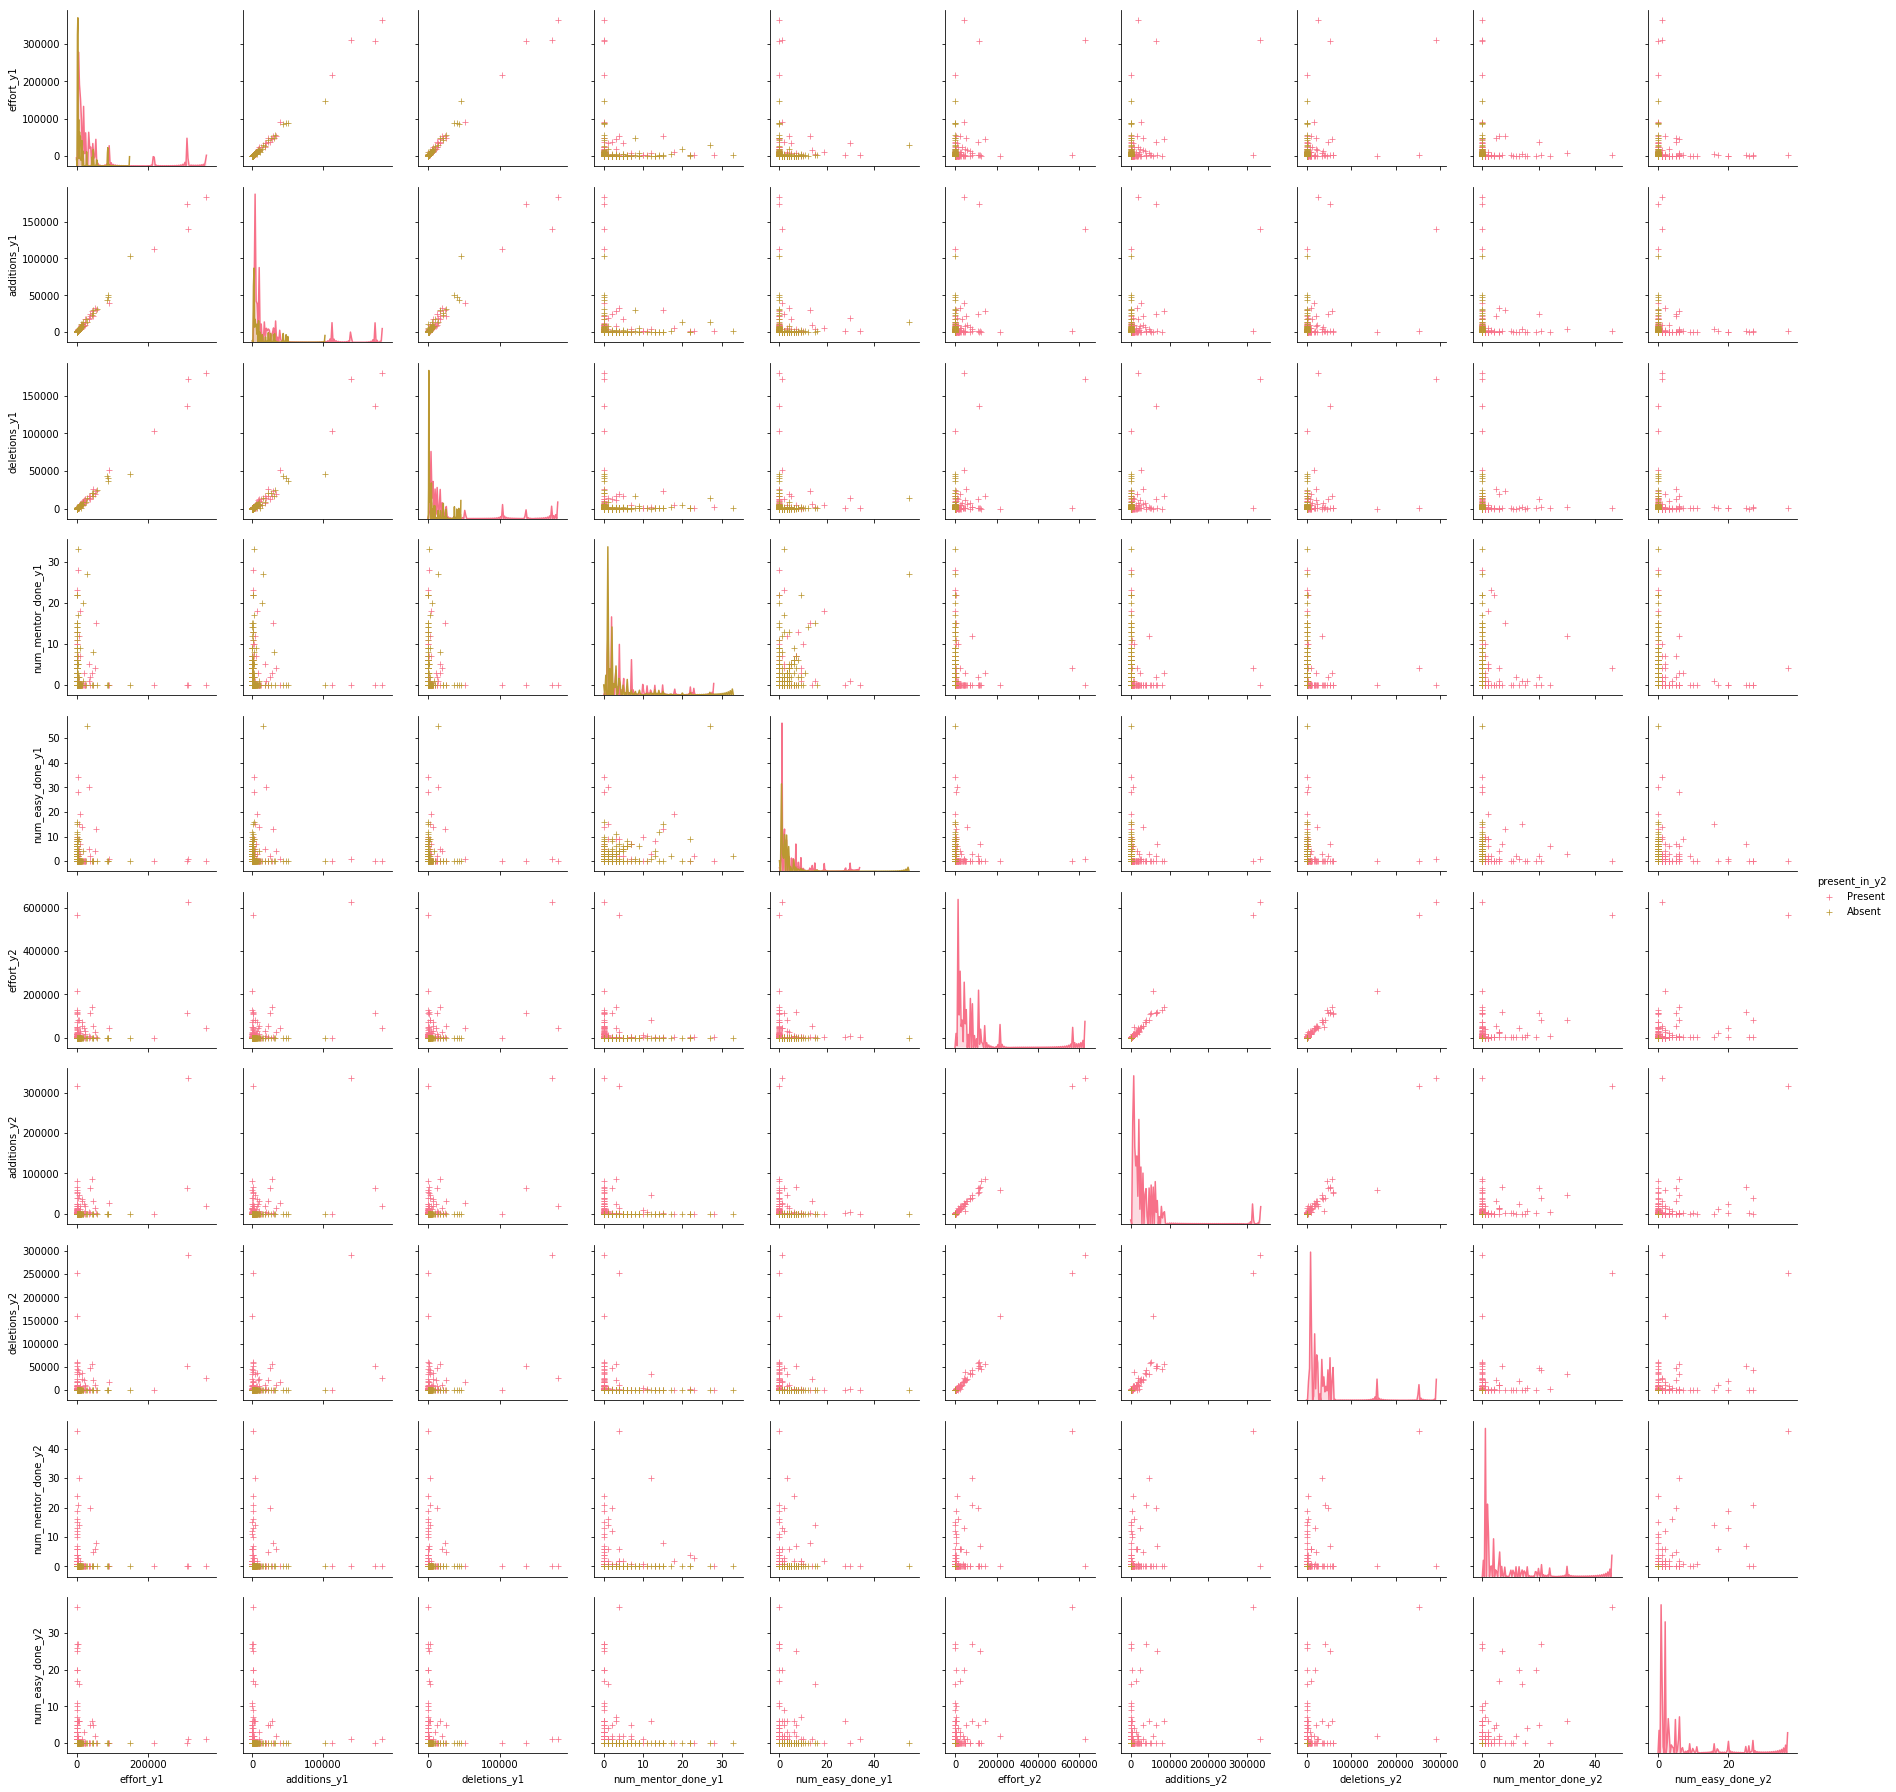

In [4]:
tmp = data.drop('User', axis=1)
g = sns.pairplot(tmp, hue='present_in_y2', markers='+')
plt.show()

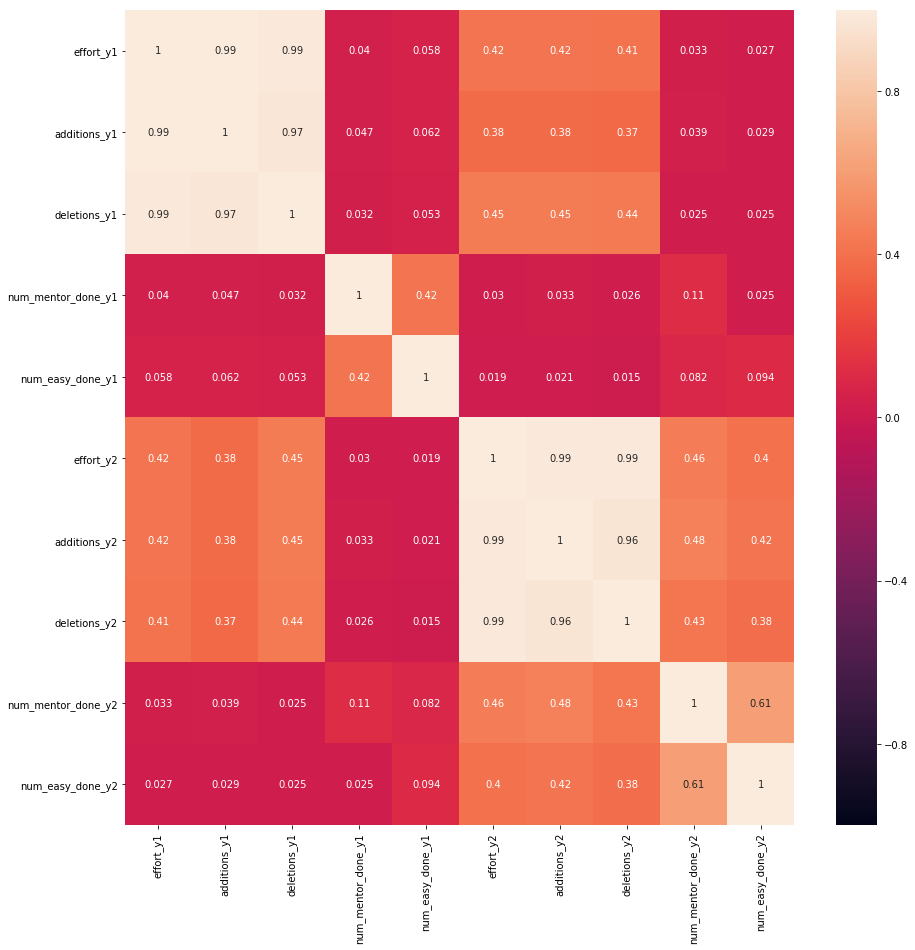

In [5]:
#Pairwise correlation between attributes
plt.figure(figsize = (15,15))
sns.heatmap(data[['effort_y1', 'additions_y1', 'deletions_y1', 'num_mentor_done_y1','num_easy_done_y1','effort_y2','additions_y2','deletions_y2','num_mentor_done_y2','num_easy_done_y2','present_in_y2' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

In [ ]:
## Are you more likely to stick around your second year 
## if you delete more code?
## The best perdictor of effort_y2 is deletions_y1

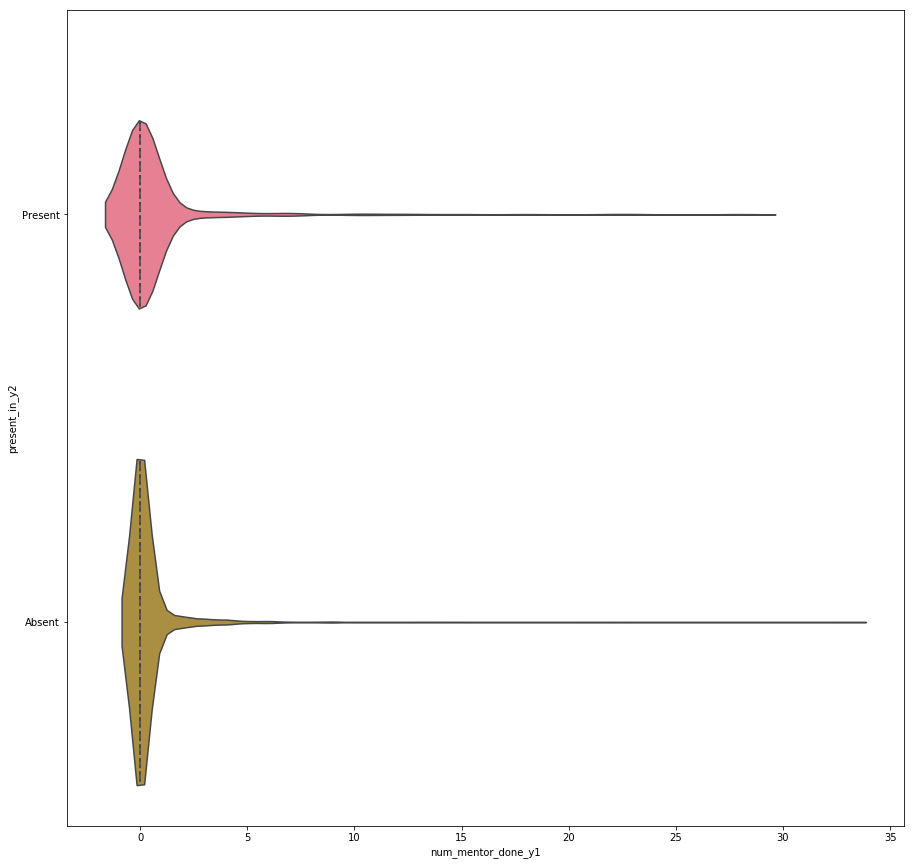

In [11]:
plt.figure(figsize = (15,15))
g = sns.violinplot(y='present_in_y2', x='num_mentor_done_y1', data=data, inner='quartile')
plt.show()

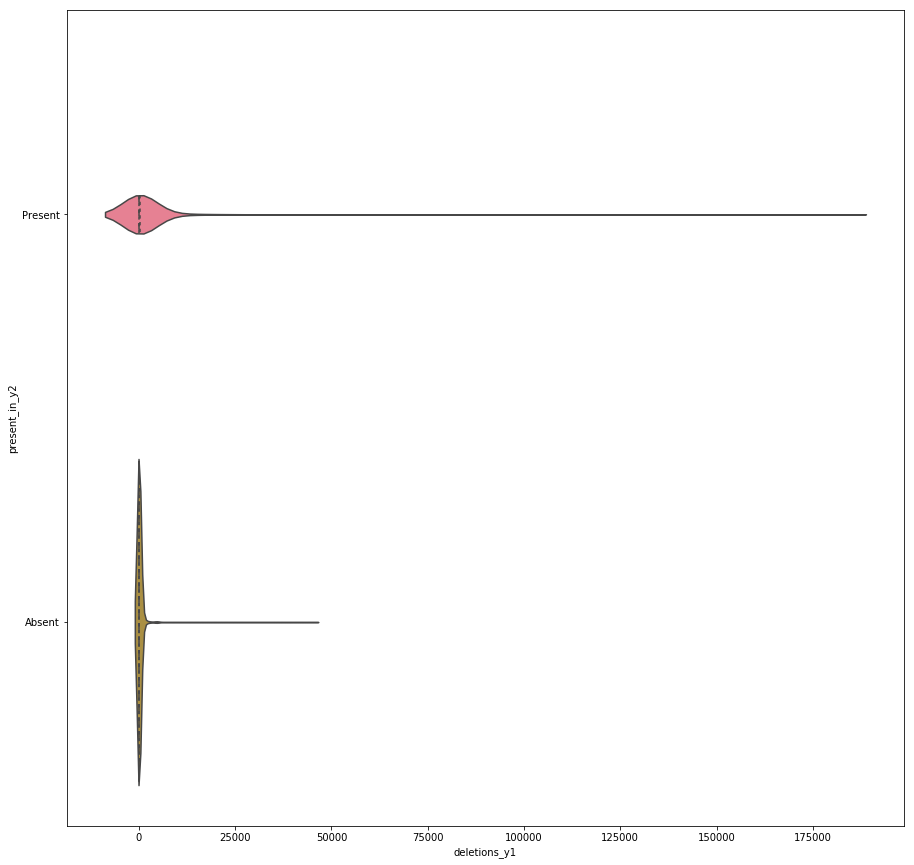

In [12]:
plt.figure(figsize = (15,15))
g = sns.violinplot(y='present_in_y2', x='deletions_y1', data=data, inner='quartile')
plt.show()

In [13]:
gk = data.groupby('present_in_y2')

In [14]:
gk.describe()

effort_y1                                                      \
                  count         mean           std  min   25%    50%    75%   
present_in_y2                                                                 
Absent           1722.0   663.787456   5812.803089  1.0   4.0   20.0   92.0   
Present           436.0  4910.513761  29928.475493  1.0  22.5  150.0  874.5   

                        additions_y1               ... num_mentor_done_y2  \
                    max        count         mean  ...                75%   
present_in_y2                                      ...                      
Absent         148397.0       1722.0   404.405923  ...                0.0   
Present        363590.0        436.0  2643.561927  ...                0.0   

                    num_easy_done_y2                                          \
                max            count      mean       std  min  25%  50%  75%   
present_in_y2                                                                  
Absent          0.0           1722.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
Present        46.0            436.0  0.938073  3.711222  0.0  0.0  0.0  0.0   

                     
                max  
present_in_y2        
Absent          0.0  
Present        37.0  

[2 rows x 80 columns]

In [15]:
gk['deletions_y1'].describe()

,count,mean,std,min,25%,50%,75%,max
present_in_y2,,,,,,,,
Absent,1722.0,259.381533,2319.274803,0.0,1.0,5.0,24.0,45553.0
Present,436.0,2266.951835,14800.527617,0.0,4.0,37.0,243.5,179998.0


In [16]:
## we can see the present people on average have more deletions 

In [17]:
gk['effort_y2'].describe()

,count,mean,std,min,25%,50%,75%,max
present_in_y2,,,,,,,,
Absent,1722.0,0.00000,0.000000,0.0,0.00,0.0,0.00,0.0
Present,436.0,8424.91055,45155.191362,1.0,22.75,132.5,1272.25,627101.0


In [18]:
gk['effort_y1'].describe()

,count,mean,std,min,25%,50%,75%,max
present_in_y2,,,,,,,,
Absent,1722.0,663.787456,5812.803089,1.0,4.0,20.0,92.0,148397.0
Present,436.0,4910.513761,29928.475493,1.0,22.5,150.0,874.5,363590.0


<Figure size 1080x3240 with 0 Axes>

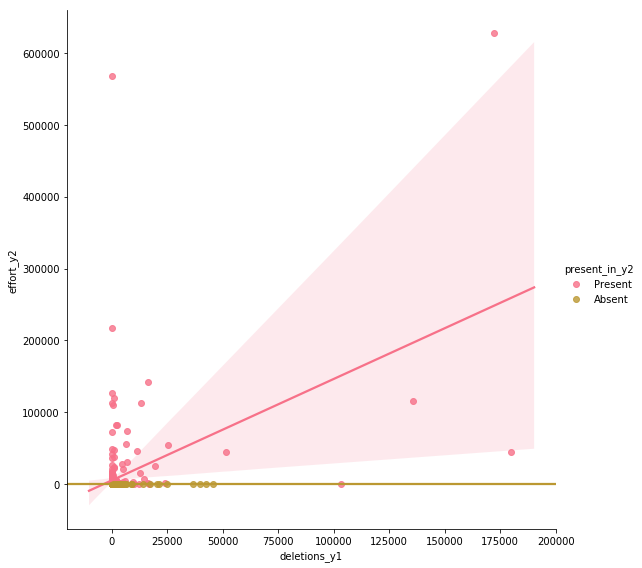

In [20]:
fig=plt.figure(figsize=(15, 45))
sns.lmplot('deletions_y1', 'effort_y2', data=data, 
           hue='present_in_y2', height=8, fit_reg=True)

<Figure size 1080x3240 with 0 Axes>

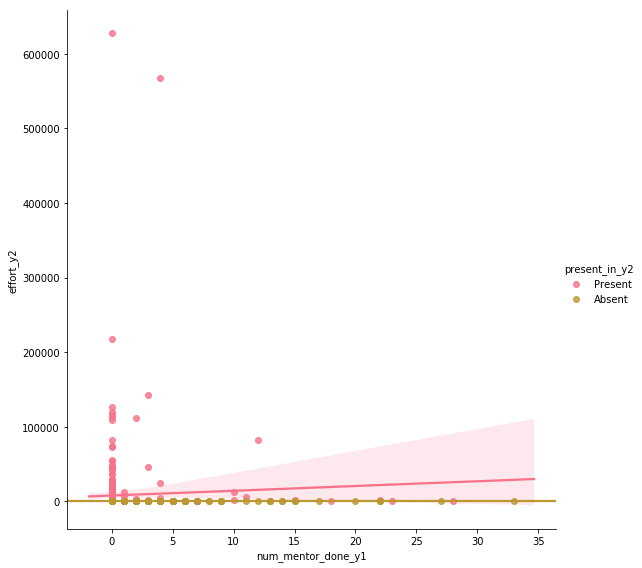

In [21]:
fig=plt.figure(figsize=(15, 45))
sns.lmplot('num_mentor_done_y1', 'effort_y2', data=data, 
           hue='present_in_y2', height=8, fit_reg=True)

<Figure size 1080x3240 with 0 Axes>

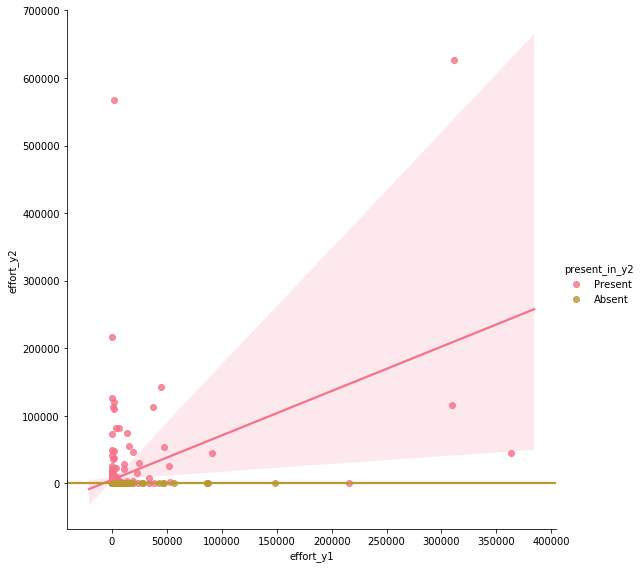

In [22]:
fig=plt.figure(figsize=(15, 45))
sns.lmplot('effort_y1', 'effort_y2', data=data, 
           hue='present_in_y2', height=8, fit_reg=True)

In [ ]:
## I can try taking log values for better graphs, but there really isnt
## anything crazy in the data :/

# other than deletions_y1 -> effort_y2